# COGS 108 Final Project

# Overview

For this project my goal was to analyze the statistical measures that play a role in who wins the MVP award in the NBA regular season and how the emphasis on different measures has changed over time. To do this I utilized a dataset containing the season statistics of everyone who has received any MVP votes from the 1980 - 1981 season to the 2017 - 2018 season. The first step was to identify which statistical measures seemed to have a stronger correlation to the number of MVP votes received, followed by an analysis of how the the statistical performance of MVP candidates has changed over time.

# Name

 - Varun Baddam

# Research Question

What effect do different statistical measures currently measured in the NBA have in determining whether or not a specific NBA player receives the MVP award? In addition, how has the importance of these statistical measures relative to each other changed over time?

# Background and Prior Work

The National Basketball Association, or NBA is the world's predominant professional basketball league. At the end of every regular season (excluding playoffs) the NBA selectes and MVP or Most Valuable Player. The goal of this award is to recognize the player who has played the largest role in helping their team achieve success in that season. Since the 1980 - 1981 season the MVP has been determined by a group of media members, each placing a first to fifth place vote for who they think is most deserving. First place votes are worth 10 points, second place votes are worth seven, third place votes are worth five, fourth place votes are worth three and fifthplace votes are worth one. The points are then totaled to determine who is termed the seasons Most Valuable Player.

All though it may seem trivial at the outset, the MVP award can have a large impact on the legacy a player builds. No NBA player who has won a MVP award has not been elected into the Hall of Fame (1). In addition, often times player contracts have financial incentives tied to season awards, while at the very least these awards can increase a player's future contract and endorsement values by millions of dollars (2). 

At the initial conception of the MVP award, it was meant to be given to the best player on the best team. However voters' goals have become to determine overall value which can be impacted by the strength of the team outside of a specific player, the strength of their competition, and statistical landmarks that a player may have acheived (3). One popular method of identifying this value is win shares, a novel statistic devised by members of the NBA media. The goal of this measure is to divide the success of a team (determined by the number of wins) across the members of the team through the use of more fundamental statistics. Although not used as an end all, be all measure to determine MVP voting, win shares have already shown a strong correlation to the end of season voting results (4). In the 2016 - 2017 season specifically, although the MVP was not the player with the highest number of win shares, the voting results showed a strong preference for those players who had a win share value signifcantly higher than the league average.

Attempts have been made to use analytics to predict upcoming MVPs which can provide a very insightful look into what factors are deemed as more important. One such attempt split the theoretical value of a players season evenly between team performance and individual contribution, with the individual contribution being a factor of the amount a player played and their net impact as determined by higher level statistical measures. Over back testing, this model was highly accurate, identifying very few players who were misranked in NBA voting in the a set of 8 NBA seasons. This gives us insight into the approximate weight of team versus individual performance and the value of statistics such as Net Plus Minus and VORP (Value Over Replaced Player) (5).

In addition the NBA has seen a transition in the style of play over the past 10 seasons specifically, with more of an emphasis being placed on three point shooting. This development interestingly was pushed forward by data analytics due to the simple fact that a player shooting 36.2% on three pointers versus shooting 46% on two point shots will end up scoring more on the same number of shots if taking threes (both shooting percentages are 2017 - 2018 league wide averages) (6). This, however, is a very simplified look at the way basketball is played and the success of this strategy has been examined. The results show a stronger chance of a team's success when making more three point shots, but do not in any way show that three point shooting is the key to always winning (7).

    1. http://www.notinhalloffame.com/blogs/from-the-desk-of-the-chairman/6274-awards-hof-part-one-the-nba-mvp
    2. https://core.ac.uk/download/pdf/159384909.pdf
    3. https://www.nba.com/news/blogtable-what-criteria-matters-most-making-mvp-decision
    4. https://bleacherreport.com/articles/2703290-metrics-101-whos-the-nba-mv
    5. https://towardsdatascience.com/nba-mvp-predictor-c700e50e0917
    6. https://www.basketball-reference.com/leagues/NBA_stats_per_game.html
    7. https://www.nbcsports.com/philadelphia/nba-insider-tom-haberstroh/lies-damned-lies-and-statistics-confusing-analytics-nbas-3-point

# Hypothesis

I predict that team winning percentage and players Points Per Game averaged will heavily determine the player who will be selected as the MVP. I also predict that an analysis of statistics over time will show that offensive statistics such as scoring and specifically three point shooting will show a greater correlation with MVP award winners.

I believe this hypothesis because history and studies show that it is extremely rare for a player not from one of the top few teams to be selected MVP. Furthermore, this player is almost always atleast in the top 10 for scoring in the league. In the recent years players such as Steph Curry and James Harden who are known specifically for their scoring and three point shooting have consistently placed very high in MVP voting which may also indicate a change over time.

# Data

Dataset Name: NBA MVP votings through history
Dataset Link: https://www.kaggle.com/danchyy/nba-mvp-votings-through-history?select=mvp_votings.csv
This dataset contains 637 rows and 27 columns.

This dataset was compiled by Daniel Bratulić and contains data sourced from Basketball Reference. This dataset contains the complete seasons stats for each player who has received any votes for the MVP award from the 1980 - 1981 season to the 2017 - 2018 season. The data set cotains what are referred to as standard statisitcs such as points per game, assists per game, etc. There are also a multitude of what I refer to as higher level statistics such as PER (player efficiency rating), TS% (true shooting percetnage), and win shares. These higher level statistics are measures that have been created by NBA media personal to assist in the analysis of player performance.

# Setup

In [65]:
import pandas as pd
import seaborn as sns
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [2]:
data  = pd.read_csv("mvp_votings.csv")

In [3]:
data.head(10)

,Unnamed: 0,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,...,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,...,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,...,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,...,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,...,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,...,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182
5,5,15.2,0.1,5.0,22.0,0.583,23.3,5.9,1980-81,Marques Johnson,...,20.3,6.8,4.6,1.5,0.5,0.552,0.000,0.706,11.2,0.211
6,6,14.2,0.0,4.8,25.2,0.579,27.1,5.0,1980-81,Robert Parish,...,18.9,9.5,1.8,1.0,2.6,0.545,0.000,0.710,10.9,0.228
7,7,15.4,0.6,6.3,17.0,0.516,24.6,2.0,1980-81,Dennis Johnson,...,18.8,4.6,3.7,1.7,0.8,0.436,0.216,0.820,8.4,0.154
8,8,9.6,0.1,5.2,14.3,0.582,17.5,-1.3,1980-81,Tiny Archibald,...,13.8,2.2,7.7,0.9,0.2,0.499,0.000,0.816,6.9,0.118
9,9,18.5,0.2,4.1,18.0,0.556,24.5,0.8,1980-81,Jamaal Wilkes,...,22.6,5.4,2.9,1.5,0.4,0.526,0.077,0.758,8.5,0.135


# Data Cleaning

In [4]:
data.describe()

,Unnamed: 0,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,win_pct,votes_first,...,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.00000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,318.000000,16.493878,1.990738,6.431868,22.451491,0.568061,26.456829,4.55573,0.630860,6.362637,...,21.929670,7.430298,4.985086,1.428728,0.983046,0.494264,0.256515,0.779834,10.689639,0.187165
std,184.030342,3.885812,2.205053,2.220213,3.731392,0.039137,4.869641,2.69811,0.108075,20.226226,...,5.151078,3.292937,2.838656,0.586569,0.933544,0.045071,0.154165,0.087450,3.377285,0.048531
min,0.000000,3.700000,0.000000,1.300000,10.100000,0.441000,7.100000,-2.80000,0.219512,0.000000,...,4.700000,1.900000,0.800000,0.200000,0.000000,0.384000,0.000000,0.422000,2.300000,0.046000
25%,159.000000,13.900000,0.100000,4.800000,19.900000,0.542000,23.600000,2.60000,0.560976,0.000000,...,18.800000,4.800000,2.700000,1.000000,0.300000,0.463000,0.167000,0.737000,8.400000,0.155000
50%,318.000000,16.700000,1.000000,6.200000,22.600000,0.566000,26.600000,4.50000,0.646341,0.000000,...,21.800000,6.900000,4.300000,1.400000,0.600000,0.492000,0.300000,0.789000,10.600000,0.186000
75%,477.000000,19.100000,3.600000,7.900000,24.700000,0.596000,29.800000,6.10000,0.707317,1.000000,...,25.600000,10.300000,6.700000,1.800000,1.400000,0.523000,0.364000,0.842000,12.900000,0.218000
max,636.000000,27.800000,11.200000,13.100000,31.700000,0.699000,41.700000,15.60000,0.890244,131.000000,...,37.100000,18.700000,14.500000,3.700000,5.600000,0.670000,1.000000,0.948000,21.200000,0.322000


In [5]:
data.isnull().values.any()

False

As can be seen above all of the 637 entries seem to have the proper set of values, no rows need to be dropped.

The next step is to drop columns which are unnecessary, primarily because they are directly represented by other measures.

In [6]:
data.columns


Index(['Unnamed: 0', 'fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
       'season', 'player', 'win_pct', 'votes_first', 'points_won',
       'points_max', 'award_share', 'g', 'mp_per_g', 'pts_per_g', 'trb_per_g',
       'ast_per_g', 'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct',
       'ws', 'ws_per_48'],
      dtype='object')

In [7]:
df = data

In [8]:
df = df.drop(columns = ['Unnamed: 0','season',"player","votes_first","points_won","points_max","fga","fg3a",
                        "fta", "g","mp_per_g", "ws_per_48"])

Following is an explanation of why the previous columns were dropped:

1. Season simply indicates which season the statistics are from and is not required currently for the first analysis.

2. Player is the player name which is also unnecessary during analysis.

3. votes_first indicate the number of first place votes which is not necessary.

4. points_won and points_max are refer to the number of points earned from MVP voting. The points_max value can change from season to season meaning the only correct way to compare across seasons is with a ratio which is given in column award_share. Essentially, award_share represents points_won and points_max making the aforementioned two columns unnecessary.

5. fga, fg3a, fta represent field goal attempts (all shots), 3 point field goal attempts (only three point shots), and free throw attempts (only free throws). For our purposes all three measures are not relevant, because each measure has an accompanying percentage which indicates shot efficiency (shots made/shots attempted), while pts_per_g (points per game) gives us an insight into the volume of shots taken.

6. g represents games played, which is not necessary because ws (Win Shares) is a cumulative statistical measure across the season. This means that the more games played the higher the Win Shares, given that a player continually performs well. In addition, it is very highly uncommon for MVP candidates to receive MVP votes if they have not played almost all of the games in a season.

7. mp_per_g represnts minutes played per game which similar to g, is taken into account through Win Shares. The players on the court more will have a higher effect on their teams winning and any player receiving MVP votes is likely a starter all playing similar levels of minutes per game.

8. ws_per_48 indicates Win Shares scaled to if each player played the full 48 minutes in a regular basketball game. Because we are using Win Shares as both a measure of player performance quality and the quantity of time spent on the court, using this would be counterintuitive. Scaling the Win Shares would not provide any new meaningful data.

In [9]:
df.columns

Index(['per', 'ts_pct', 'usg_pct', 'bpm', 'win_pct', 'award_share',
       'pts_per_g', 'trb_per_g', 'ast_per_g', 'stl_per_g', 'blk_per_g',
       'fg_pct', 'fg3_pct', 'ft_pct', 'ws'],
      dtype='object')

Following is an explanation of the remaining columns:

1. per stands for Player Efficiency Rating, a measure created by NBA analysts to quanitfy a player's efficiency on the court. This measure takes into account a majority of the standard statistics to quantify how likely a team is to score when a given player is given the ball.

2. ts_pct represents true shooting percentage, a measure that aims to combine the three separate shooting percentages (field goal, 3 point field goals, and free throws) in a meaningful way to give a larger scale representation of how efficient a player is at scoring.

3. usg_pct represents usage percentage, which indicates how often a player is used while on the court.

4. bpm stands for Box Plus Minus. Plus Minus is a measure that aims to quantify the effect a player has when on the court. A positive number indicates that a player has a positive impact on the team's performance when playing while a negative indicates the oppostie.

5. win_pct represents the teams total win percentage in that particular season. As touched on earlier we know from previous studies that the success of the team is often a very important factor in MVP voting.

6. award_share as touched on earlier indicates the award points received/total possible award points. This indicates the success a player had in MVP voting.

7. pts_per_g, trb_per_g, ast_per_g, stl_per_g, blk_per_g comprise the standard statistics. These are points, total rebounds, assists, steals, and blocks per game respectively. These each represent a unique action performed on the basketball court and along with shooting percentages form the basis for most of the higher level statistical measures.

8. fg_pct, fg3_pct, ft_pct represent field goal percentage, 3 point field goal percentage, and free throw percentage respectively. These are the measures for how efficient a player shot the ball from those three sections of the court (shots made/total shots attempted).

9. ws represnts Win Shares, a higher level statistic that aims to quantify how many total wins over the course of a season can be attributed to a single player. Every won game, a share of that win is given to a player based on how well they performed, and the total is added at the end of the season for this measure.

In [10]:
df = df.rename(columns={'per': 'PER', 'ts_pct': 'True_Shooting%','usg_pct': 'Usage%', 'bpm': 'Plus/Minus', 
                        'win_pct': 'Win%', 'award_share': 'Award_Share','pts_per_g': 'Points', 
                        'trb_per_g': 'Rebounds', 'ast_per_g' : 'Assists', 'stl_per_g': 'Steals', 
                        'blk_per_g' : 'Blocks', 'fg_pct' : 'Field_Goal%', 'fg3_pct' : '3pt%', 
                        'ft_pct' : 'Free_Throw%', 'ws': 'Win_Shares'})

# Data Analysis

## Feature Selection

Feature selection comprises a primary portion of this analysis, determining which features are the most relevant in determining the resulting MVP votes.

Now that many of the directly unnecessary statistical measure have been removed, the goal of the next section is to find measures that seem to have very little impact on award_share (our measure of a players success in MVP voting). In addition, because many of these statistics are higher level statistics derived from similar standard statistics we may find that they may be representing very similar information which makes it unnecessary to keep multiple.

For the first step I decided to run a Random Forest Regressor and Feature Selector, to determine what effect a particular statistical measure has on award shares. This is a step to remove measures that may have very little effect on MVP voting outcomes.

In [11]:
df.columns

Index(['PER', 'True_Shooting%', 'Usage%', 'Plus/Minus', 'Win%', 'Award_Share',
       'Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Field_Goal%',
       '3pt%', 'Free_Throw%', 'Win_Shares'],
      dtype='object')

In [12]:
features = ['PER', 'True_Shooting%', 'Usage%', 'Plus/Minus', 'Win%',
       'Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Field_Goal%',
       '3pt%', 'Free_Throw%', 'Win_Shares']

In [13]:
x_data = df[features].to_numpy()
y_data = df[['Award_Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )

In [14]:
regressor= RandomForestRegressor(n_estimators=200)

In [15]:
regressor.fit(x_data,y_data)

RandomForestRegressor(n_estimators=200)

In [16]:
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {regressor.feature_importances_[index]}")

Win_Shares: 0.3928107767612171
Win%: 0.14390758497830586
PER: 0.12293802813854617
Plus/Minus: 0.07255102790611231
Usage%: 0.04486685165858675
Free_Throw%: 0.0329710823963029
Assists: 0.03147830484130144
Points: 0.031159317207648734
Field_Goal%: 0.028787487705014797
True_Shooting%: 0.024380115926472722
Rebounds: 0.02235805034044188
3pt%: 0.02113683878460849
Blocks: 0.015944639137299838
Steals: 0.01470989421814102


In [17]:
selector = SelectKBest(mutual_info_regression, k=5)

best_feat = selector.fit_transform(x_data, y_data)

sorted_indices = np.argsort(selector.scores_)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {selector.scores_[index]:.4f}")

Win_Shares: 0.3016
PER: 0.2733
Plus/Minus: 0.2033
Points: 0.1584
Win%: 0.1105
Usage%: 0.1008
True_Shooting%: 0.0732
Rebounds: 0.0645
Steals: 0.0301
Free_Throw%: 0.0260
Field_Goal%: 0.0241
Assists: 0.0187
Blocks: 0.0182
3pt%: 0.0000


In addition, prior to removing any measures I will use a heatmap through Seaborn to calculate which statistics have a heavy overlap, indicating unnecessary redundancies.

In [18]:
data = df[features + ["Award_Share"]]

<AxesSubplot:>

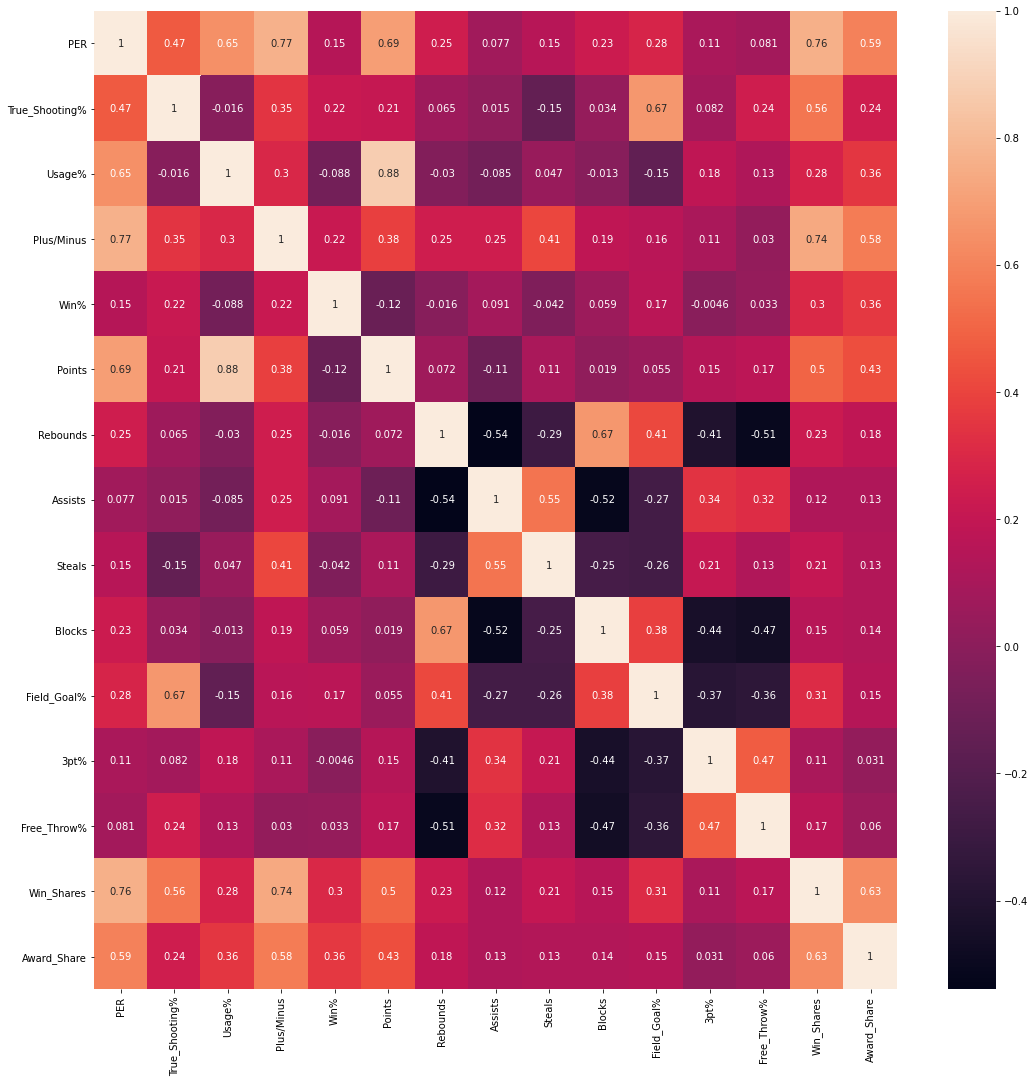

In [19]:
fig = plt.figure(figsize=(18, 18))
sns.color_palette("Set3")
sns.heatmap(data.corr(), annot=True)

From both the Random Forest Regression and the Feature Selecter we can see that Steals and Blocks have very little impact on the award shares. This falls in slightly in line with my hypothesis in that both are defensive measures and I felt that offensive measures would be more important. In addition, Win Shares seem to have the most impact on award shares while being highly correlated to both PER and Plus/Minus. Intuitively, this makes sense in that all three measures use similar base statistics for their resulting calculations.

To ensure proper feature selection the same steps will be run through again, after removing Steals, Blocks, PER, and Plus/Minus.

In [20]:
features = ['True_Shooting%', 'Usage%', 'Win%',
       'Points', 'Rebounds', 'Assists', 'Field_Goal%',
       '3pt%', 'Free_Throw%', 'Win_Shares']

In [21]:
x_data = df[features].to_numpy()
y_data = df[['Award_Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )

In [22]:

regressor= RandomForestRegressor(n_estimators=200)

In [23]:
regressor.fit(x_data,y_data)

RandomForestRegressor(n_estimators=200)

In [24]:
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {regressor.feature_importances_[index]}")

Win_Shares: 0.5038467707927842
Win%: 0.14334826340067616
Usage%: 0.08299725470254647
Assists: 0.04962396605057615
Points: 0.04482873799545191
Free_Throw%: 0.04293137805709537
Field_Goal%: 0.037386658745281326
Rebounds: 0.03457260264223809
3pt%: 0.0325431200652589
True_Shooting%: 0.027921247548091426


In [25]:
selector = SelectKBest(mutual_info_regression, k=5)

best_feat = selector.fit_transform(x_data, y_data)

sorted_indices = np.argsort(selector.scores_)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {selector.scores_[index]:.4f}")

Win_Shares: 0.2960
Points: 0.1567
Win%: 0.1080
Usage%: 0.0999
Rebounds: 0.0693
True_Shooting%: 0.0660
Free_Throw%: 0.0323
Field_Goal%: 0.0228
Assists: 0.0228
3pt%: 0.0000


<AxesSubplot:>

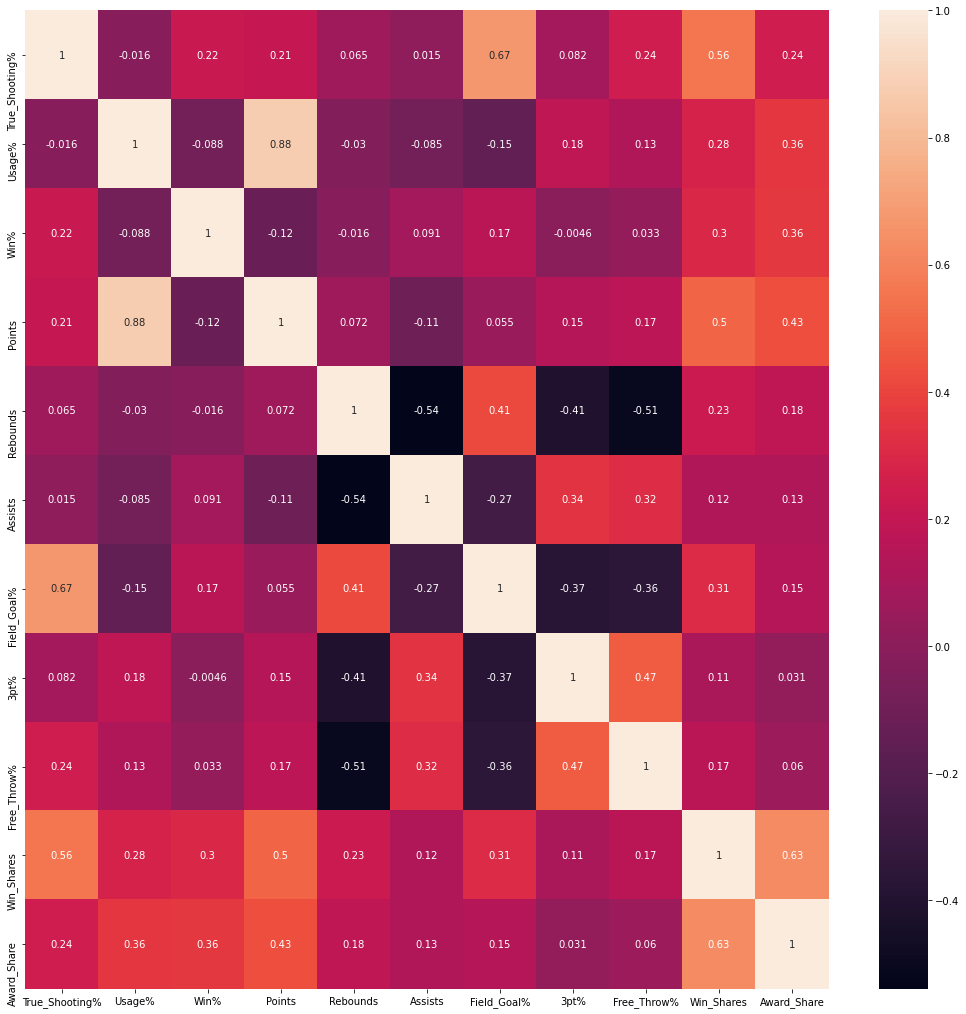

In [26]:
data = df[features + ["Award_Share"]]

fig = plt.figure(figsize=(18, 18))
sns.color_palette("Set3")
sns.heatmap(data.corr(), annot=True)

In this second iteration, we notice that in the Random Forest Regressor and the Feature Selector 3pt % seems to be not highly related to Award Shares. Normally this would be considered an unnecessary statistic, however due to the nature of the hypothesis and intuitive knowledge three point shooting has changed the way the game is played. In addition, logically it would not make sense to remove only 3pt % and not Field Goal and Free Throw %.

## Model Generation

The next step is to generate a model and determine whether or not the features selected can effectively determine who will win the MVP award. In order to run the logistical regression model for this section a columns first has to be added indicating whether or not a player won or lost the MVP. To make the model more robust, train test split is used which subsets the data into a training set and test set. The model is trained only on the training set and is tested against the test set to prove the model's efficacy. The logisitical regression was used because our goal was to condense multiple input values into a binary output (MVP won or lost).

In [27]:
temp = pd.read_csv("mvp_votings.csv")

In [28]:
temp["Won"]=0

In [29]:
for i in range(1,len(temp)):
    if temp['season'][i]!= temp['season'][i-1]:
        temp["Won"][i] =1

<ipython-input-29-b7f45ced5f2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Won"][i] =1


In [30]:
temp["Won"][0]=1

<ipython-input-30-2519612681de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Won"][0]=1


In [31]:
temp.head(50)

,Unnamed: 0,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,...,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,Won
0,0,18.6,0.2,6.5,25.1,0.572,28.4,8.0,1980-81,Julius Erving,...,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,1
1,1,18.3,0.9,4.0,19.9,0.528,24.3,5.1,1980-81,Larry Bird,...,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,0
2,2,18.2,0.0,6.9,25.5,0.616,26.3,5.3,1980-81,Kareem Abdul-Jabbar,...,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,0
3,3,19.3,0.0,10.1,25.1,0.585,27.6,3.7,1980-81,Moses Malone,...,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,0
4,4,21.1,0.4,7.6,22.9,0.555,32.3,1.6,1980-81,George Gervin,...,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,0
5,5,15.2,0.1,5.0,22.0,0.583,23.3,5.9,1980-81,Marques Johnson,...,6.8,4.6,1.5,0.5,0.552,0.000,0.706,11.2,0.211,0
6,6,14.2,0.0,4.8,25.2,0.579,27.1,5.0,1980-81,Robert Parish,...,9.5,1.8,1.0,2.6,0.545,0.000,0.710,10.9,0.228,0
7,7,15.4,0.6,6.3,17.0,0.516,24.6,2.0,1980-81,Dennis Johnson,...,4.6,3.7,1.7,0.8,0.436,0.216,0.820,8.4,0.154,0
8,8,9.6,0.1,5.2,14.3,0.582,17.5,-1.3,1980-81,Tiny Archibald,...,2.2,7.7,0.9,0.2,0.499,0.000,0.816,6.9,0.118,0
9,9,18.5,0.2,4.1,18.0,0.556,24.5,0.8,1980-81,Jamaal Wilkes,...,5.4,2.9,1.5,0.4,0.526,0.077,0.758,8.5,0.135,0


In [32]:
temp = temp.rename(columns={'per': 'PER', 'ts_pct': 'True_Shooting%','usg_pct': 'Usage%', 'bpm': 'Plus/Minus', 
                        'win_pct': 'Win%', 'award_share': 'Award_Share','pts_per_g': 'Points', 
                        'trb_per_g': 'Rebounds', 'ast_per_g' : 'Assists', 'stl_per_g': 'Steals', 
                        'blk_per_g' : 'Blocks', 'fg_pct' : 'Field_Goal%', 'fg3_pct' : '3pt%', 
                        'ft_pct' : 'Free_Throw%', 'ws': 'Win_Shares'})

As can be seen above, any player who won the MVP award is indicated by a 1 in the Won column and all others are 0.

In [33]:
final_df = temp[['True_Shooting%', 'Usage%', 'Win%',
       'Points', 'Rebounds', 'Assists', 'Field_Goal%',
       '3pt%', 'Free_Throw%', 'Win_Shares', 'Won']]
final_df

,True_Shooting%,Usage%,Win%,Points,Rebounds,Assists,Field_Goal%,3pt%,Free_Throw%,Win_Shares,Won
0,0.572,28.4,0.756098,24.6,8.0,4.4,0.521,0.222,0.787,13.8,1
1,0.528,24.3,0.756098,21.2,10.9,5.5,0.478,0.270,0.863,10.8,0
2,0.616,26.3,0.658537,26.2,10.3,3.4,0.574,0.000,0.766,14.3,0
3,0.585,27.6,0.487805,27.8,14.8,1.8,0.522,0.333,0.757,13.7,0
4,0.555,32.3,0.634146,27.1,5.1,3.2,0.492,0.257,0.826,10.5,0
...,...,...,...,...,...,...,...,...,...,...,...
632,0.570,29.1,0.573171,23.1,8.5,2.0,0.510,0.293,0.837,10.9,0
633,0.590,24.9,0.573171,22.2,5.3,4.9,0.474,0.350,0.854,8.9,0
634,0.675,31.0,0.707317,26.4,5.1,6.1,0.495,0.423,0.921,9.1,0
635,0.573,33.4,0.634146,22.9,11.0,3.2,0.483,0.308,0.769,6.2,0


In [34]:
Y = final_df.Won
X = final_df.drop('Won', axis = 1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [36]:
lm = LogisticRegression()

In [37]:
lm.fit(X_train,y_train)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
lm.score(X_test, y_test)

0.9479166666666666

As we can see from the scoring of the model using our current input variables our model is able to generate the correct prediction around 94% of the time. By examining the coefficients we can see which particular variables have a higher weight in determining the outcome, therefore providing us with information to compare back to our first hypothesis.

In [39]:
lm.coef_

array([[-0.08288611,  0.23012157,  1.74845743, -0.04900394,  0.1724115 ,
         0.22040816, -0.16081688, -0.31505288,  0.59312025,  0.49078013]])

Next, I implemented a decision tree classifier to veryify the results of our logistical regression model. Logically, it makes more sense to use the logistical regression model for this particular data set, with the coefficients giving us vital insight into our research question. The sole purpose of using the decision tree classifier is to verify that our given inputs can generate a successful predicitve model.

In [40]:
dtree = DecisionTreeClassifier()

In [41]:
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)

0.9479166666666666

Now that the decision tree classifier also shows a high success rate we can move on to the next steps, referring back to the logistical regression model. To verify that this relationship exists we can take the variables with the highest coefficients and create linear regressions as compared to Win Shares. The goal is to show that there is indeed a correlation between each of these variables and the probability of a player winning the MVP. The variables with the the highest coefficients in order are: Win%, Win_Shares, and Free_Throw%. 

In [66]:
new_data = pd.read_csv("mvp_votings.csv")

In [67]:
new_data = new_data.rename(columns={'per': 'PER', 'ts_pct': 'True_Shooting%','usg_pct': 'Usage%', 'bpm': 'Plus/Minus', 
                        'win_pct': 'Win%', 'award_share': 'Award_Share','pts_per_g': 'Points', 
                        'trb_per_g': 'Rebounds', 'ast_per_g' : 'Assists', 'stl_per_g': 'Steals', 
                        'blk_per_g' : 'Blocks', 'fg_pct' : 'Field_Goal%', 'fg3_pct' : '3pt%', 
                        'ft_pct' : 'Free_Throw%', 'ws': 'Win_Shares', 'fg3a' : '3pt_Attempted'})

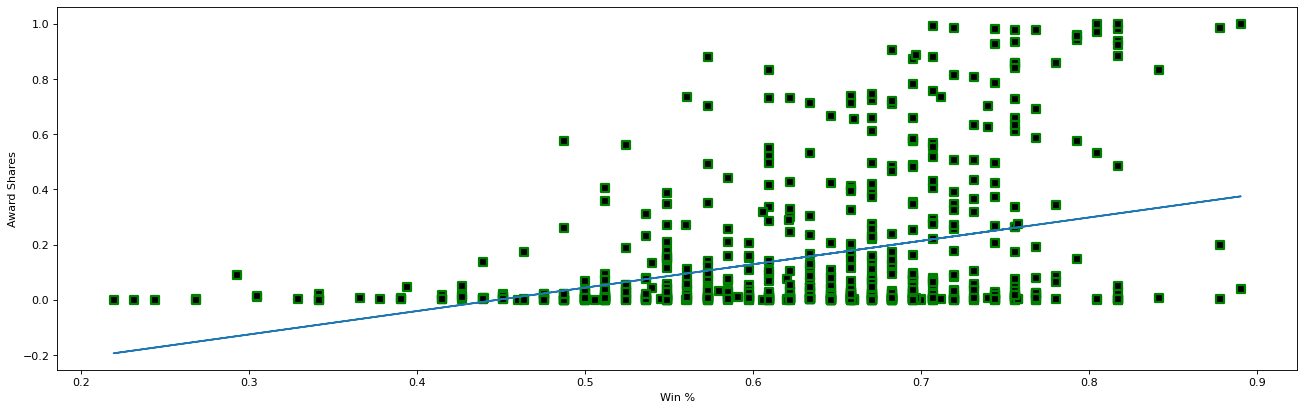

In [74]:
figure(figsize=(20, 6), dpi=80)
plt.scatter(new_data['Win%'], new_data['Award_Share'], c ="black", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="green", 
            s = 50)
m, b = np.polyfit(new_data['Win%'], new_data['Award_Share'], 1)

plt.plot(new_data['Win%'], m*new_data['Win%'] + b)
plt.xlabel("Win %")
plt.ylabel("Award Shares")

plt.show()

As can be seen in the plot of Win% vs Award Shares, we can see that our previous conclusion is supported, in that Win % seems to be loosely correlated with MVP award vote share.

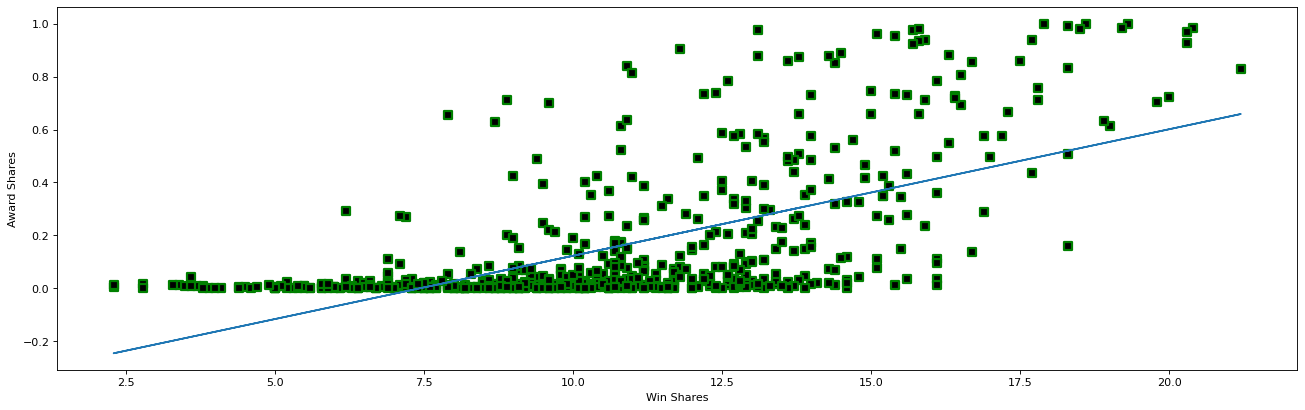

In [76]:
figure(figsize=(20, 6), dpi=80)
plt.scatter(new_data['Win_Shares'], new_data['Award_Share'], c ="black", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="green", 
            s = 50)
m, b = np.polyfit(new_data['Win_Shares'], new_data['Award_Share'], 1)

plt.plot(new_data['Win_Shares'], m*new_data['Win_Shares'] + b)
plt.xlabel("Win Shares")
plt.ylabel("Award Shares")

plt.show()

As can be seen in the plot of Win Shares vs Award Shares, we can see that our previous conclusion is supported, in that Win Shares also seems to be loosely correlated with MVP award vote share.

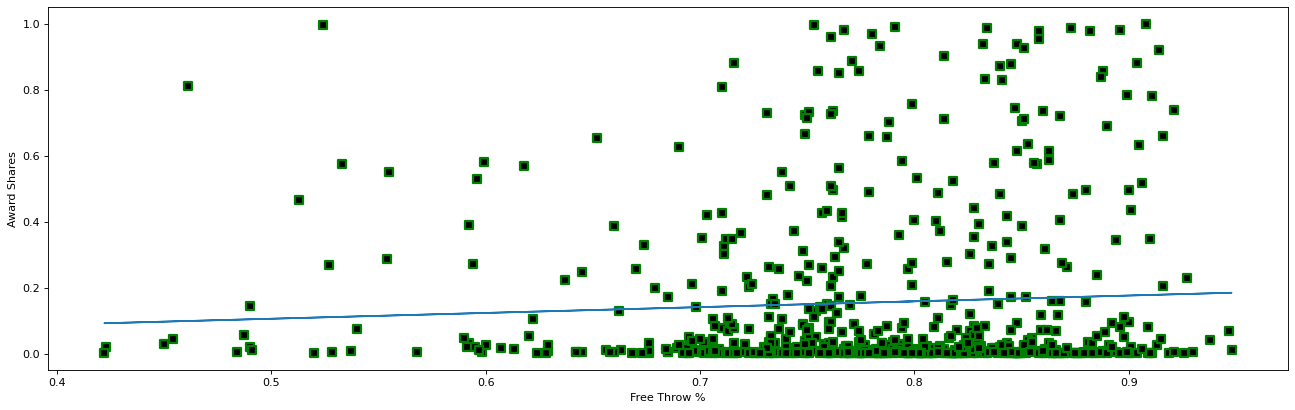

In [77]:
figure(figsize=(20, 6), dpi=80)
plt.scatter(new_data['Free_Throw%'], new_data['Award_Share'], c ="black", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="green", 
            s = 50)
m, b = np.polyfit(new_data['Free_Throw%'], new_data['Award_Share'], 1)

plt.plot(new_data['Free_Throw%'], m*new_data['Free_Throw%'] + b)
plt.xlabel("Free Throw %")
plt.ylabel("Award Shares")

plt.show()

As can be seen in the plot of Free Throw % vs Award Shares, the correlation between the two factors is very loose, not nearly as strong as the correlation of the previous two.

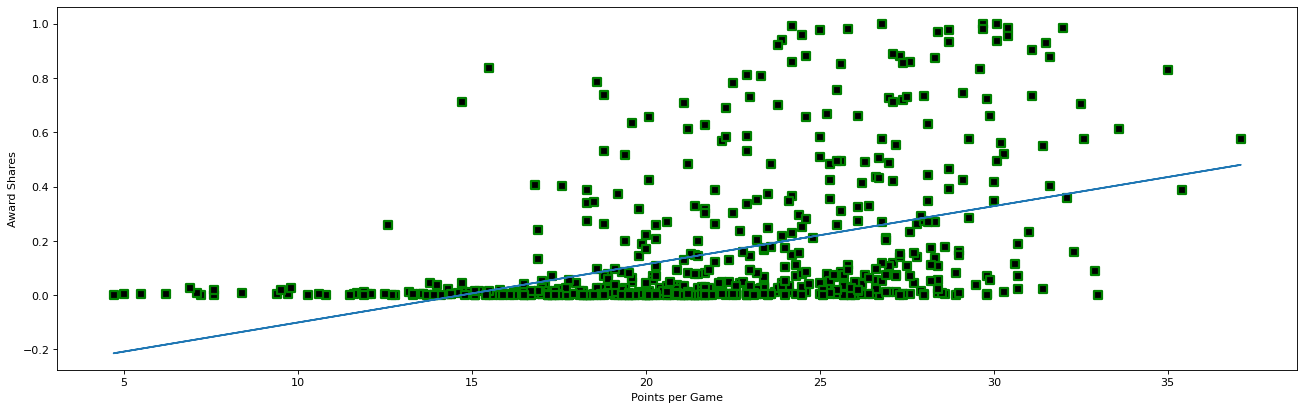

In [79]:
figure(figsize=(20, 6), dpi=80)
plt.scatter(new_data['Points'], new_data['Award_Share'], c ="black", 
            linewidths = 2, 
            marker ="s", 
            edgecolor ="green", 
            s = 50)
m, b = np.polyfit(new_data['Points'], new_data['Award_Share'], 1)

plt.plot(new_data['Points'], m*new_data['Points'] + b)
plt.xlabel("Points per Game")
plt.ylabel("Award Shares")

plt.show()

In addition to the previous three charts, in order to test the hypothesis I decided to chart the same relation with regards to points. This graph also supports the idea that there is a loose correlation between points scored per game and success in MVP voting.

## Time Based Analysis

Another part of the research question was to examine the way the emphasis on different statistics has changed over time. In order to do that I selected 6 distinct season progressing over time and ran the Random Forest Regressor on each. The results of this regression yield a weightage for each statistical field showing how they corresponded to the Award Shares for each player in that particular season.

In [44]:
new_data.columns

Index(['Unnamed: 0', 'fga', '3pt_Attempted', 'fta', 'PER', 'True_Shooting%',
       'Usage%', 'Plus/Minus', 'season', 'player', 'Win%', 'votes_first',
       'points_won', 'points_max', 'Award_Share', 'g', 'mp_per_g', 'Points',
       'Rebounds', 'Assists', 'Steals', 'Blocks', 'Field_Goal%', '3pt%',
       'Free_Throw%', 'Win_Shares', 'ws_per_48'],
      dtype='object')

In [49]:
df_1980 = new_data.loc[new_data['season']== "1980-81"]
df_1990 = new_data.loc[new_data['season']== "1990-91"]
df_2000 = new_data.loc[new_data['season']== "2000-01"]
df_2010 = new_data.loc[new_data['season']== "2010-11"]
df_2014 = new_data.loc[new_data['season']== "2014-15"]
df_2018 = new_data.loc[new_data['season']== "2017-18"]

In [50]:
features = ['PER', 'True_Shooting%', 'Usage%', 'Plus/Minus', 'Win%',
       'Points', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Field_Goal%',
       '3pt%', 'Free_Throw%', 'Win_Shares', '3pt_Attempted']

In [51]:
x_data = df_1980[features].to_numpy()
y_data = df_1980[['Award_Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )
regressor= RandomForestRegressor(n_estimators=200)
regressor.fit(x_data,y_data)
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {regressor.feature_importances_[index]}")

Win_Shares: 0.3691228542039354
Plus/Minus: 0.18013492665169265
Rebounds: 0.15308958029461936
Free_Throw%: 0.10840670144673992
Points: 0.028365376692634923
Steals: 0.02779608583797139
Win%: 0.026644954473463815
Usage%: 0.023497908865937923
Blocks: 0.023430358013239228
PER: 0.02251150915498381
3pt_Attempted: 0.01025257502869242
Field_Goal%: 0.01012687855416082
Assists: 0.008827054850144407
3pt%: 0.005154595510836428
True_Shooting%: 0.0026386404209475206


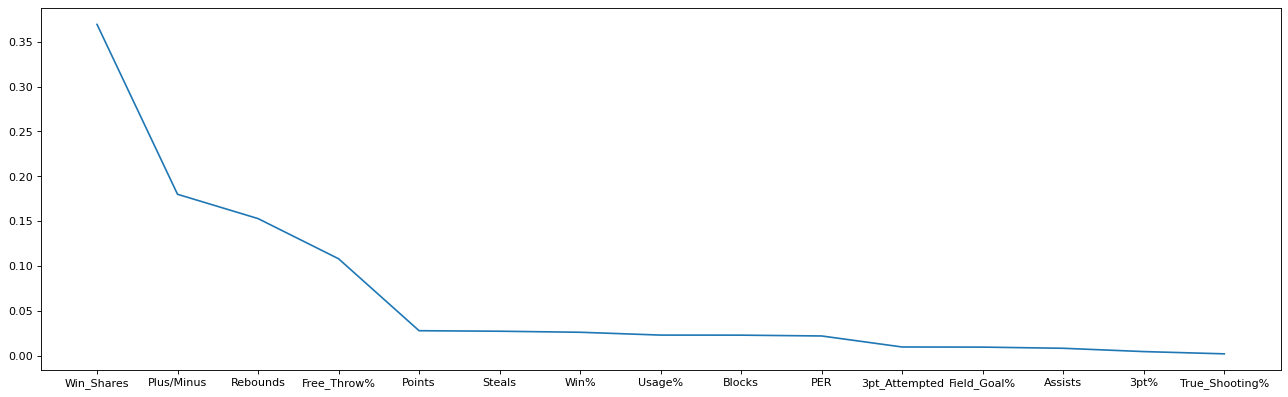

In [52]:
lst =[]
lst_y =[]
for index in sorted_indices:
    lst.append(regressor.feature_importances_[index])
    lst_y.append(features[index])

y_axis_plot= lst
x_axis_plot = lst_y

figure(figsize=(20, 6), dpi=80)
# Define x and y axes
plt.plot(x_axis_plot, 
        y_axis_plot)

In [53]:
x_data = df_1990[features].to_numpy()
y_data = df_1990[['Award_Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )
regressor= RandomForestRegressor(n_estimators=200)
regressor.fit(x_data,y_data)
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {regressor.feature_importances_[index]}")

Win_Shares: 0.286218132435345
PER: 0.25638704429160747
Plus/Minus: 0.22451064454817704
Free_Throw%: 0.04472942366864491
Win%: 0.0432168642144918
Points: 0.029630093406260962
True_Shooting%: 0.022296370114463872
Assists: 0.018540547721333355
Rebounds: 0.018320796067976743
Steals: 0.017167959047923228
Usage%: 0.015701524294950576
Blocks: 0.011915887449022007
Field_Goal%: 0.006075522996202675
3pt%: 0.002795464019225617
3pt_Attempted: 0.0024937257243746844


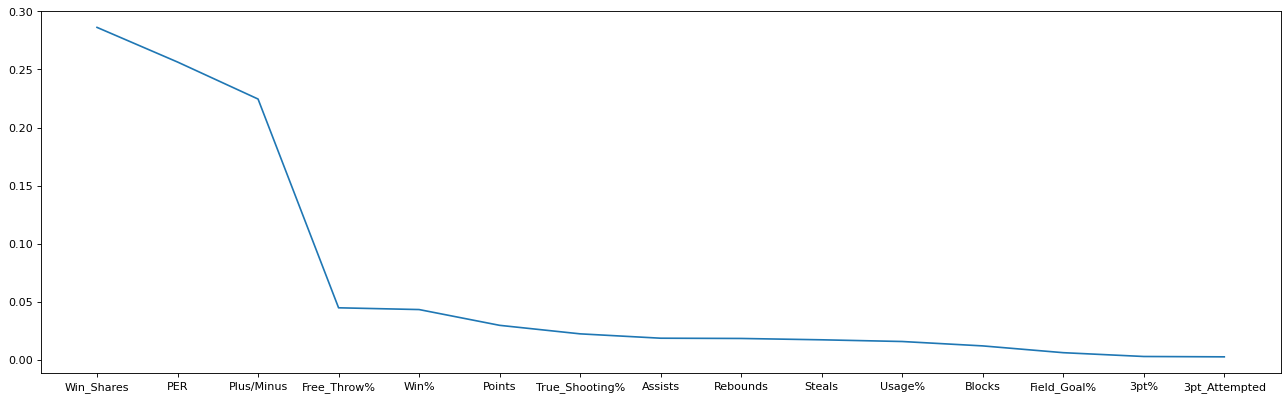

In [54]:
lst =[]
lst_y =[]
for index in sorted_indices:
    lst.append(regressor.feature_importances_[index])
    lst_y.append(features[index])

y_axis_plot= lst
x_axis_plot = lst_y

figure(figsize=(20, 6), dpi=80)
# Define x and y axes
plt.plot(x_axis_plot, 
        y_axis_plot)

In [55]:
x_data = df_2000[features].to_numpy()
y_data = df_2000[['Award_Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )
regressor= RandomForestRegressor(n_estimators=200)
regressor.fit(x_data,y_data)
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {regressor.feature_importances_[index]}")

Free_Throw%: 0.24864533086779406
Win%: 0.1828854614110589
Rebounds: 0.10405138424137697
Steals: 0.10339920544061224
Points: 0.09985877778977087
True_Shooting%: 0.0627895028709112
Usage%: 0.033834818989654354
Field_Goal%: 0.02731170001347522
Assists: 0.02682186846854245
3pt%: 0.02586968770671181
Plus/Minus: 0.02273960636147895
PER: 0.021046837240303297
Blocks: 0.020629416115972295
Win_Shares: 0.010579084755661055
3pt_Attempted: 0.009537317726676408


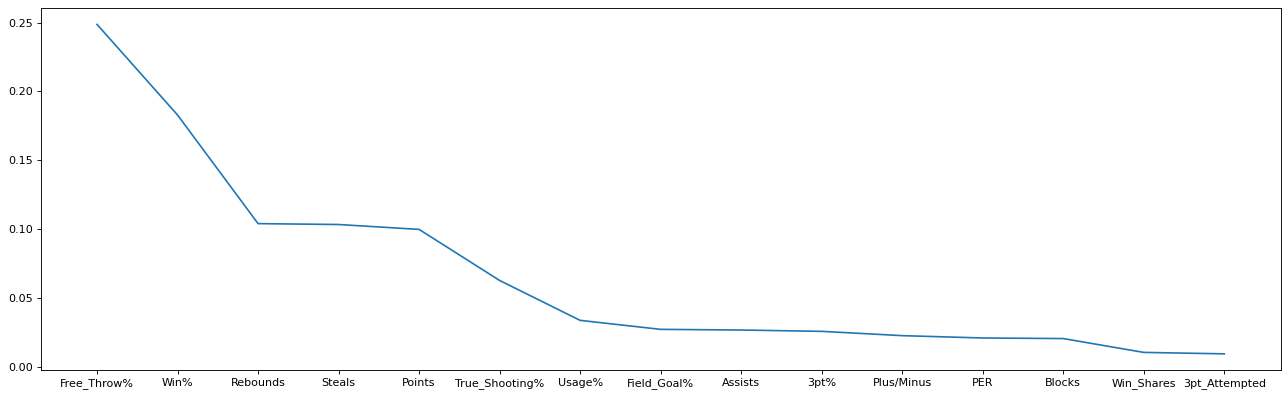

In [56]:
lst =[]
lst_y =[]
for index in sorted_indices:
    lst.append(regressor.feature_importances_[index])
    lst_y.append(features[index])

y_axis_plot= lst
x_axis_plot = lst_y

figure(figsize=(20, 6), dpi=80)
# Define x and y axes
plt.plot(x_axis_plot, 
        y_axis_plot)

In [57]:
x_data = df_2010[features].to_numpy()
y_data = df_2010[['Award_Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )
regressor= RandomForestRegressor(n_estimators=200)
regressor.fit(x_data,y_data)
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {regressor.feature_importances_[index]}")

Win_Shares: 0.1930302609062778
Win%: 0.1831724189253261
PER: 0.16478753607471008
Field_Goal%: 0.09848273831324321
Usage%: 0.09553016553097438
True_Shooting%: 0.04322610189120041
3pt%: 0.040158578007466555
3pt_Attempted: 0.03394121962291384
Assists: 0.02774222453887261
Rebounds: 0.024795750637172997
Steals: 0.02398572067670581
Free_Throw%: 0.022157386000310385
Plus/Minus: 0.0220264992920731
Points: 0.0166185277139407
Blocks: 0.01034487186881208


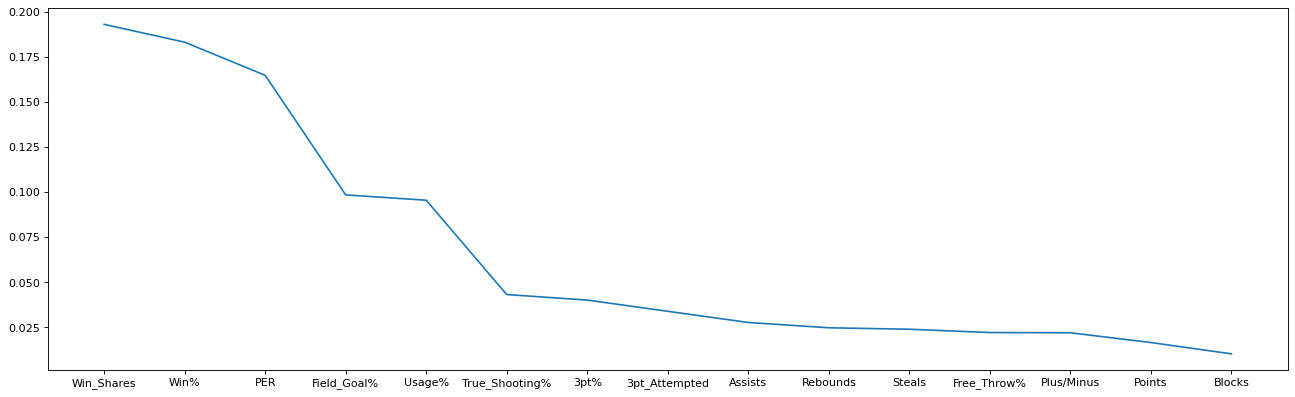

In [58]:
lst =[]
lst_y =[]
for index in sorted_indices:
    lst.append(regressor.feature_importances_[index])
    lst_y.append(features[index])

y_axis_plot= lst
x_axis_plot = lst_y

figure(figsize=(20, 6), dpi=80)
# Define x and y axes
plt.plot(x_axis_plot, 
        y_axis_plot)

In [59]:
x_data = df_2014[features].to_numpy()
y_data = df_2014[['Award_Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )
regressor= RandomForestRegressor(n_estimators=200)
regressor.fit(x_data,y_data)
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {regressor.feature_importances_[index]}")

True_Shooting%: 0.24205988776698578
Points: 0.1120907944723891
Rebounds: 0.110958770807461
Win_Shares: 0.09795177734501327
Usage%: 0.08781266403356727
3pt_Attempted: 0.08594298578799661
Win%: 0.05256886761544342
Plus/Minus: 0.04086243269888448
Free_Throw%: 0.03072986425387353
PER: 0.030107149929916456
Blocks: 0.029943533760363766
Assists: 0.028007314685692196
3pt%: 0.026178417910520693
Field_Goal%: 0.015815639372135325
Steals: 0.008969899559757022


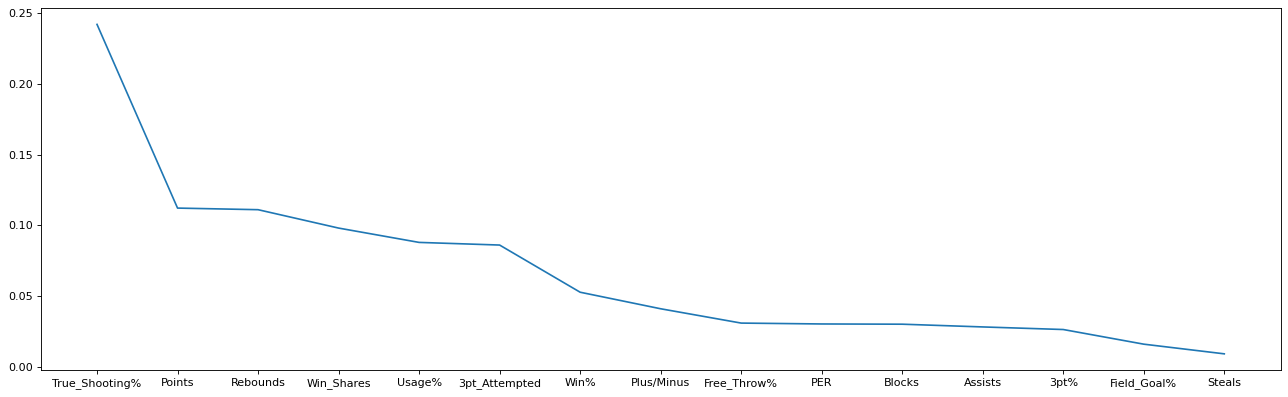

In [60]:
lst =[]
lst_y =[]
for index in sorted_indices:
    lst.append(regressor.feature_importances_[index])
    lst_y.append(features[index])

y_axis_plot= lst
x_axis_plot = lst_y

figure(figsize=(20, 6), dpi=80)
# Define x and y axes
plt.plot(x_axis_plot, 
        y_axis_plot)

In [61]:
x_data = df_2018[features].to_numpy()
y_data = df_2018[['Award_Share']].to_numpy()
y_data = y_data.reshape(y_data.shape[0], )
regressor= RandomForestRegressor(n_estimators=200)
regressor.fit(x_data,y_data)
sorted_indices = np.argsort(regressor.feature_importances_)[::-1]

for index in sorted_indices:
    print(f"{features[index]}: {regressor.feature_importances_[index]}")

Points: 0.22903178578734043
Win_Shares: 0.21425487924066033
PER: 0.11611516018142397
Plus/Minus: 0.09653149296468426
Field_Goal%: 0.0824895267193244
Free_Throw%: 0.06706498108634332
Win%: 0.032711048413412346
Usage%: 0.030831413026709272
Assists: 0.029301432859718386
3pt_Attempted: 0.02843053423580101
Blocks: 0.026127461830262703
True_Shooting%: 0.02205776302323681
Rebounds: 0.01977466373107433
Steals: 0.002859117864921093
3pt%: 0.0024187390350872153


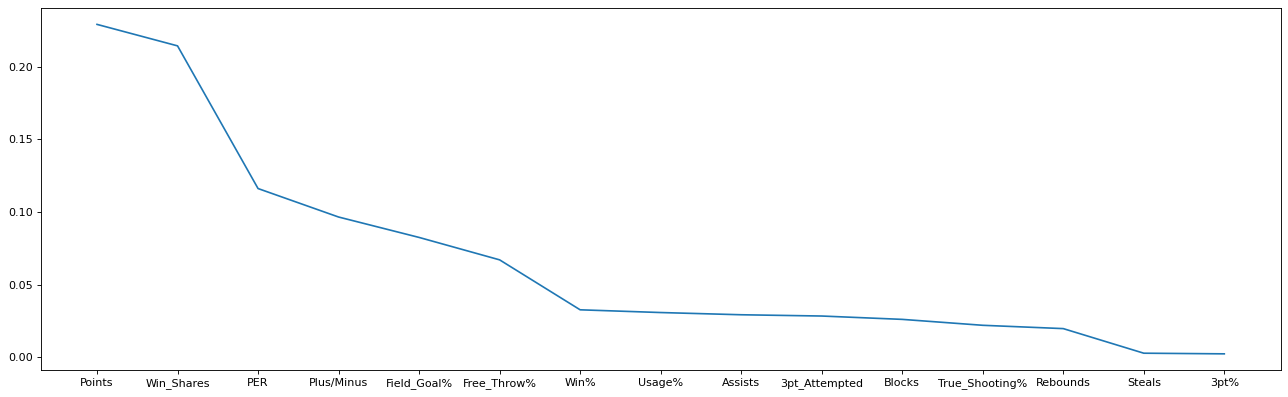

In [62]:
lst =[]
lst_y =[]
for index in sorted_indices:
    lst.append(regressor.feature_importances_[index])
    lst_y.append(features[index])

y_axis_plot= lst
x_axis_plot = lst_y

figure(figsize=(20, 6), dpi=80)
# Define x and y axes
plt.plot(x_axis_plot, 
        y_axis_plot)

When looking at an aggregation of the results of the 6 Random Forest Regressions, it is clear that every season is different from the previous season. However, there does not seem to be a consistent trend towards or away from any statistics. Because the weightages resulting from each season heavily depend on the players who received higher award shares, the overall trends seemed to depend on the players in that particular season. For example, in the 2014 season True Shooting was the metric that ranked the highest corresponding to Award Shares. In this season Stephen Curry, widely regarded as one of the greatest shooters of all time, won the MVP by a wide margin. His performance in a single season alone provided a marked difference from the previous season, and therefore makes the data across seasons difficult to compare. There are many great players in the NBA with a variety of different play styles, who regularly receive many votes for MVP. This means that the MVP candidates population, may not be the best to represent changes in the NBA as a whole.

# Ethics and Privacy

Privacy concerns for this particular data set are not as much as of a concern as other data sets might have faced. This data is all publicly available, and extensive documentation of NBA statistics is available from a wide variety of sources online. NBA players are public figures and professional athletes, meaning their performances are meant for the entertainment sports fans. The job by nature is very public, meaning the game performance related data is also public. The collection of this data has been standardized over more than 70 years since statistics began being kept diligently and therefore there are minimal concerns over the integrity of the data.

A core part of the data in question is the Award voting data, which at the end of the day is a vote. This means biases among the voting population for or against certain players will be present in the voting results. Often times factors such as voter fatigue (voting for the same players over and over) and engaging media story lines can inflence media coverage players get over the season, and as a result the voting at the end of the season. These biases are a part of voting, but as touched on earlier the idea of Value in Most Valuable Player is subjective. The goal of this study was to attempt to quantify MVP voting, however with intangible factors in human perception, it will always be tough to quanitfy it completely.

# Conclusion

The question being investigated was broken down into two parts: What effect do different statistical measures currently measured in the NBA have in determining whether or not a specific NBA player receives the MVP award how has the importance of these statistical measures relative to each other changed over time. To analyze this I broke it down into two distinct parts, one part covering the importance of different statistics and one analyzing the statistics over time.

The data covered the full season stats for every player who received even a single vote for MVP from the 1980 - 1981 season to the 2017 - 2018 season. To begin the analysis, I ran a Random Forest Regression and a Feature Selector to determine which statistics seemed to be more correlated with the Award Shares. I also used a heatmap to see which sets of statistics seemed to be heavily correlated to each other, signifying statistics that represent very similar measures. I ran this process twice, removing statistical measures that were unnecessary each iteration until I settled on a final list of factors that I deemed as necessary. The next step of the analysis was to run a logistical regression model in order to test the efficacy of the model and extract the coefficients that dictated which statistical measures were the most important. After going through these steps the coefficients dictated that the three most important statistics in determining the MVP were the team winning percentage, number of win shares, and free throw percentage surprisngly. Although team winning percentage supported my hypothesis, free throw percentage was more suprising. I also predicted that points scored would have a large impact on the result, I believe this did not show up explicitly because points are heavily accounted for in Win Shares. This was slightly supported by the linear regression I ran comparing Points to Award Share, which showed a loose correlation between the two. All in all, I think the data showed some support for my hypothesis, but is not strong enough to call a conclusive result.

The second part of the analysis involved comparing seasons from different time periods to see how the emphasis of different statistics changed over time. To do this I again used a Random Forest Regression to find an ordered list of the most important statistical methods in relation to Award Shares. Over time I was able to see changes in the most important statistical measures, but the changes were not necessarily consistent over time. I believe this is because the statistics are heavily influenced by the top or top few vote getters in the MVP race. There is a large number of excellent players at the top of the league, and their success determines the statistics that are important, not the other way around. In addition, with such a small sample size of players per season, it was not feasible to be able to see league wide trends, which means the data did not support my second hypothesis.

A liability in generating the model was the relatively small size of the data set. NBA MVP voting of this particular style only began in the 1980 - 1981 season which is where our data starts. This meant only 673 entries total, out of which 38 were MVP winners. This meant for the logistical model when training and testing the data the number of actual MVP winners in the sample was low. The following code indicates how many of the predictions for MVP the model got correct:

In [64]:
lst2 = []
lst2 = lm.predict(X_test)

lst3 = pd.Series.tolist(y_test)

cnt= 0
for i in range(len(lst3)):
    if lst2[i]==1:
        if lst2[i] == lst3[i]:
            cnt+=1
print(cnt)
    

5


A vast majority of the data points in the model testing and training data were not MVPs making it artifically easier for the model to get a much higher accuracy percentage.

Data is becoming an increasingly important part of sports and especially basketball. As touched on earlier, the gamewide transition to shooting more 3 point shots is one of many developments that have been pushed forward by data analytics. Players are constantly looking for ways to improve, and increase their chance of claiming the coveted MVP award among others. This particular sample size may be too small to effectively guide players in a particular direction, with individual players affecting the statistical outcomes as much as the statistics driving the players. I believe further analysis in this field with more extensive data does have the potential to reveal more insightful and potentially game changing insights.